# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
headers_html = soup.find_all("th")
temp_rows = soup.find_all("tr")



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
print(len(soup.find_all("tr")))



1868


In [7]:
# Create empty lists which will be used to create dataframe columns
headers = []
id = []
terrestrial_date = []
sol = []
ls = []
month = []
min_temp = []
pressure = []
first_line = True




In [8]:
# Loop through the scraped data to create lists, for each of the columns

for row in temp_rows:
    #this determines what will eventually be the headers
    if first_line == True:
        table_headers = row.find_all("th")
        for header_text in table_headers:
            headers.append(header_text.text)
        #set this var to false so the subsequent iterations will grab the data, and not headers
        first_line = False
    else:
        #for each of the below, the [n] grabs each item for the column list
        row_id = row.find_all('td')[0].text
        id.append(row_id)
        row_terrestrial_date = row.find_all('td')[1].text
        terrestrial_date.append(row_terrestrial_date)
        row_sol = row.find_all('td')[2].text
        sol.append(row_sol)
        row_ls = row.find_all('td')[3].text
        ls.append(row_ls)
        row_month = row.find_all('td')[4].text
        month.append(row_month)
        row_min_temp = row.find_all('td')[5].text
        min_temp.append(row_min_temp)
        row_pressure = row.find_all('td')[6].text
        pressure.append(row_pressure)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(list(zip(id, terrestrial_date, sol, ls, month, min_temp, pressure)), columns =headers)

In [10]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis

 
# using dictionary to convert specific columns
convert_dict = {'id': int,
                'terrestrial_date': 'datetime64[ns]',
                'sol': int,
                'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float

                
                }
 
mars_df_formatted = mars_df.astype(convert_dict)
mars_df_formatted

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [13]:
# Confirm type changes were successful by examining data types again
mars_df_formatted.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
months = mars_df_formatted['month'].max()
months

12

In [15]:
# 2. How many Martian days' worth of data are there?
unique_days = mars_df_formatted['terrestrial_date'].unique().size
unique_days

1867

In [16]:
# 3. What is the average low temperature by month?
months_low_temps = mars_df_formatted[['month', 'min_temp']].groupby('month', as_index=False).mean(numeric_only=True)
months_low_temps

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


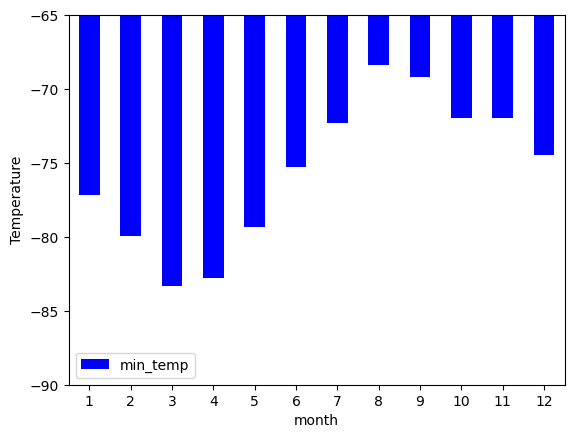

In [17]:
# Plot the average temperature by month
months_low_temps.plot(kind='bar',x='month',y='min_temp',color='blue', ylim=(-90,-65))
plt.ylabel("Temperature")
plt.xticks(rotation=0)
plt.show()


In [18]:
# Identify the coldest and hottest months in Curiosity's location
#coldest_month_temp = months['min_temp'].min()
#coldest_month_temp

coldest_month = months_low_temps[months_low_temps.min_temp == months_low_temps.min_temp.min()]

hottest_month = months_low_temps[months_low_temps.min_temp == months_low_temps.min_temp.max()]

print(f"The coldest month is the {coldest_month['month'].values[0]}rd month. And it has an average low temp of {coldest_month['min_temp'].values[0]} degrees")

print(f"The hottest month is the {hottest_month['month'].values[0]}rd month. And it has an average low temp of {hottest_month['min_temp'].values[0]} degrees")


The coldest month is the 3rd month. And it has an average low temp of -83.30729166666667 degrees
The hottest month is the 8rd month. And it has an average low temp of -68.38297872340425 degrees


In [19]:
# 4. Average pressure by Martian month
months_pressure = mars_df_formatted[['month', 'pressure']].groupby('month', as_index=False).mean()
months_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


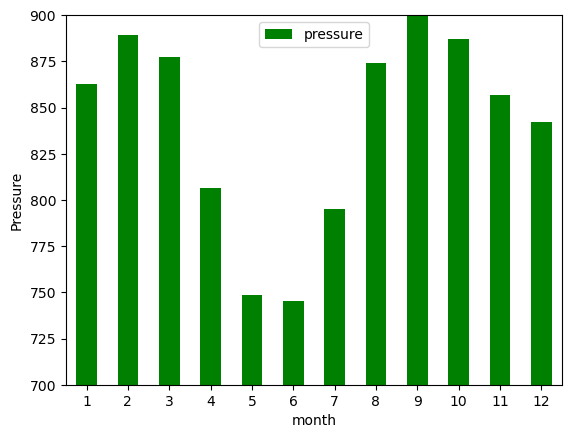

In [20]:
# Plot the average pressure by month
months_pressure.plot(kind='bar',x='month',y='pressure',color='green', ylim=(700,900))
plt.ylabel("Pressure")
plt.xticks(rotation=0)
plt.show()

2012-09-30 00:00:00
2014-08-18 00:00:00
the total number of days in a martian year, from month 7, day 1 to month 7, day 1 is 687 days 00:00:00


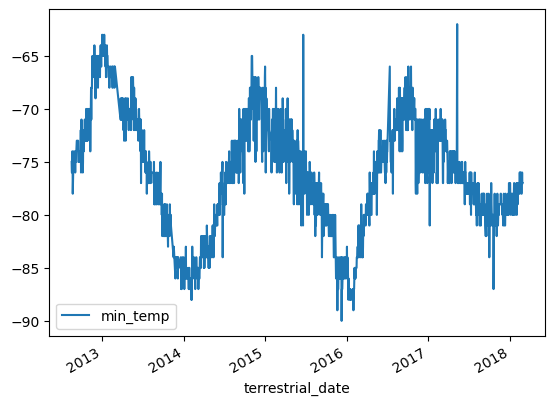

In [32]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#Find the first row of the 7th month in the data set, the firt time the 7th month comes around
first_iteration_of_7th_month = mars_df_formatted.loc[(mars_df_formatted['month']> 6) & (mars_df_formatted['sol']< 500)]

#grab only the terrestial date from that first occurance of the 7th month
first_day_of_first_7th_month = first_iteration_of_7th_month['terrestrial_date'].iloc[0]

#print out the result to make sure it's in date time format
print(first_day_of_first_7th_month)

#Find the first row of the 7th month in the data set, the second time the 7th month comes around
second_iteration_of_7th_month = mars_df_formatted.loc[(mars_df_formatted['month']> 6) & (mars_df_formatted['sol']> 500)]

#grab only the terrestial date from that first occurance of the 7th month
first_day_of_second_7th_month = second_iteration_of_7th_month['terrestrial_date'].iloc[0]

#print out the result to make sure it's in date time format
print(first_day_of_second_7th_month)

#calculate the difference between these sols
difference_tween_dates = first_day_of_second_7th_month - first_day_of_first_7th_month

print(f"the total number of days in a martian year, from month 7, day 1 to month 7, day 1 is {difference_tween_dates}")

visually illustrate that a martian year is equal to just under 2 earth years. 
mars_df_formatted.plot(x='terrestrial_date', y='min_temp')
plt.show()





On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_df_formatted.to_csv('mars_data.csv')

In [23]:
browser.quit()